<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/neural-networks-from-scratch-in-python/02_adding_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install nnfs

In [4]:
import numpy as np

import nnfs
from nnfs.datasets import spiral_data

import matplotlib.pyplot as plt

## Hidden Layers

- Neural networks become “deep” when they have 2 or more hidden layers .

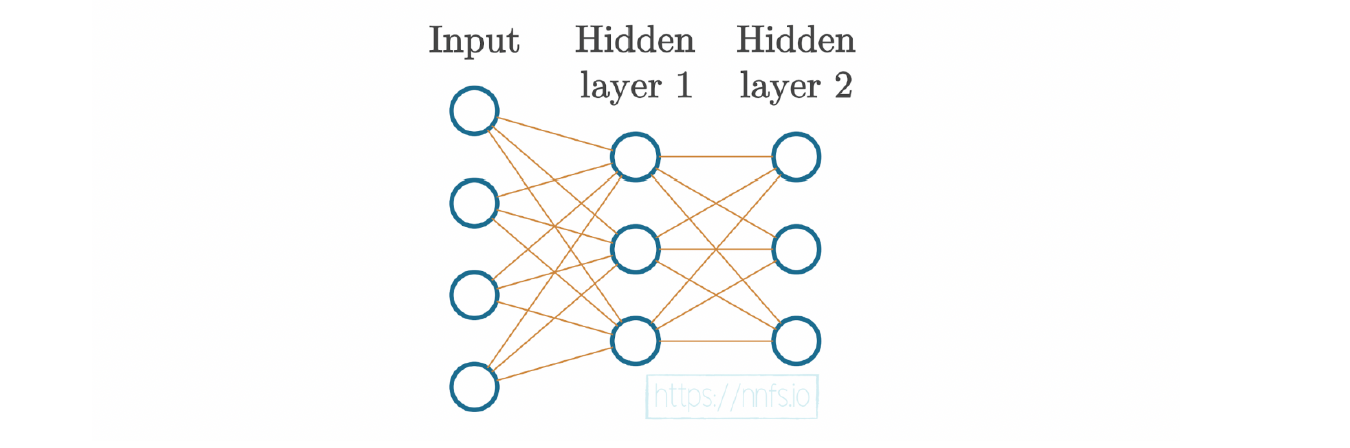

4 features input into 2 hidden layers of 3 neurons each.

In [2]:
# a group of samples (inputs)
inputs = [
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
bias = [2.0, 3.0, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]
bias2 = [-1.0, 2.0, -0.5]

layer_outputs1 = np.dot(inputs, np.array(weights).T) + bias
layer_outputs2 = np.dot(layer_outputs1, np.array(weights2).T) + bias2
print(layer_outputs2)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Training Data

- Linear data can be fit with or represented by a straight line.

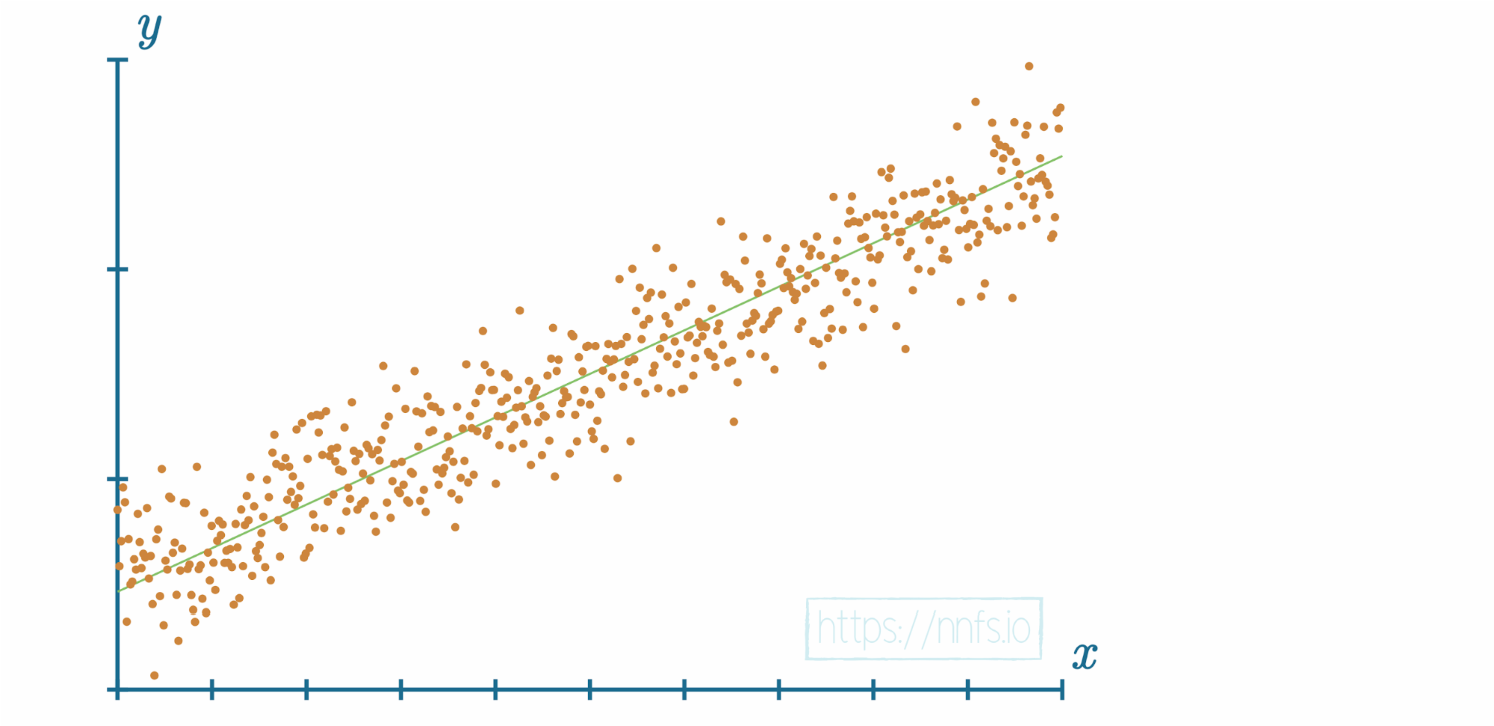

- Non-linear data cannot be represented well by a straight line.

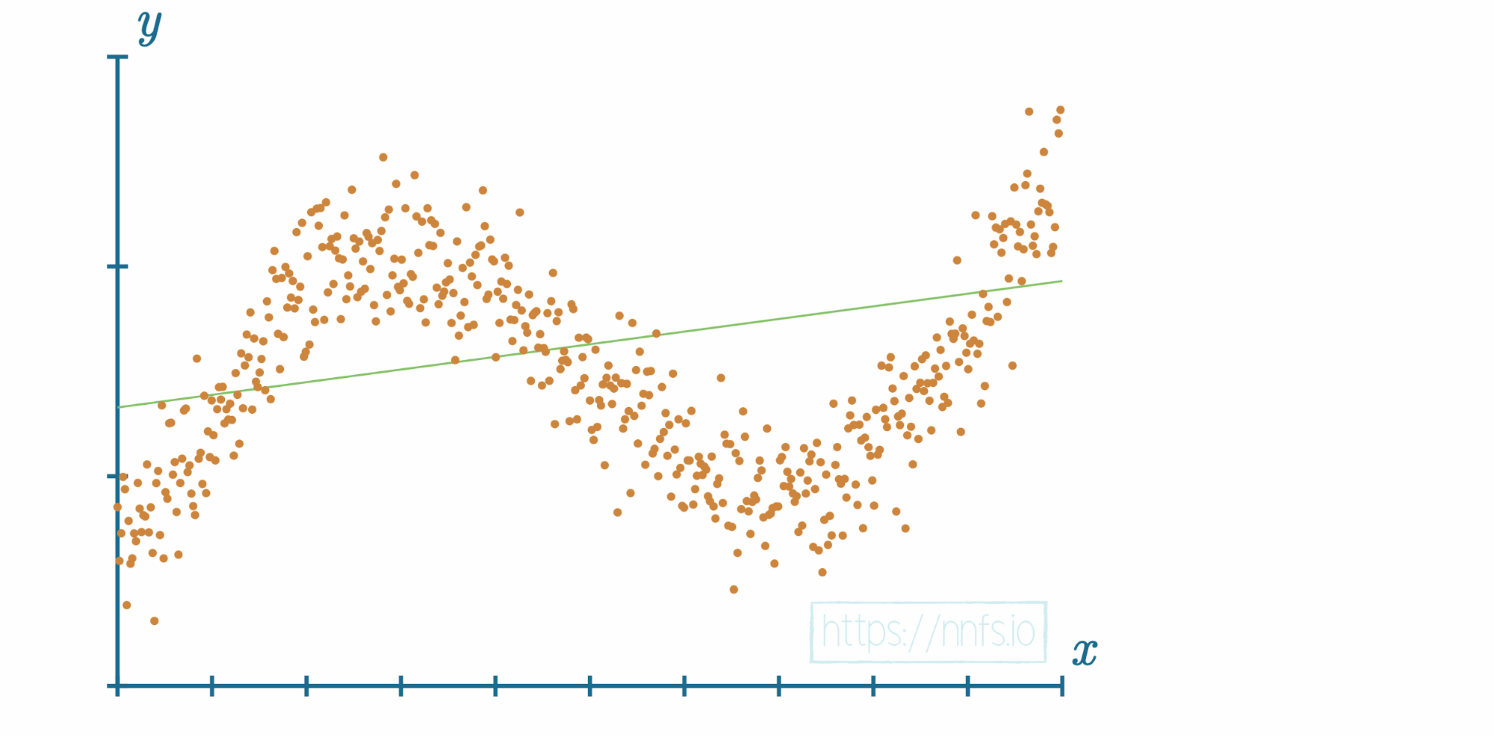

Let's create a spiral data.

In [5]:
nnfs.init()

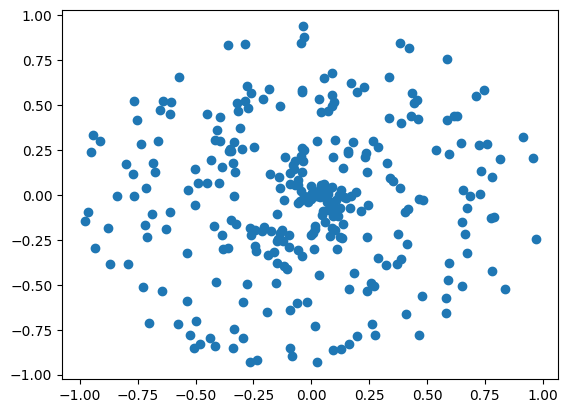

In [6]:
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

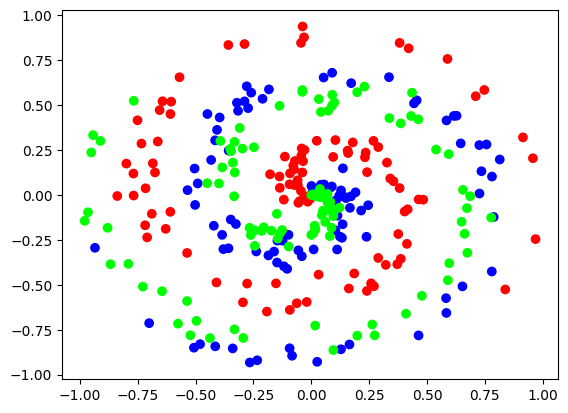

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

Keep in mind that the neural network will not be aware of the color differences as the data have
no class encodings.

## Dense Layer

In [15]:
class DenseLayer:

  # Initialize weights and biases
  def __init__(self, n_inputs, n_neurons) -> None:
    # Note that we’re initializing weights to be (inputs, neurons), rather than ( neurons, inputs)
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # Gaussian distribution with a mean of 0 and a variance of 1
    self.bias = np.zeros((1, n_neurons))

  # Forward pass: Here, we pass data through a model from beginning to end
  def forward(self, inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.bias

In [17]:
# Create Dense layer with 2 input features and 3 output values
dense_layer = DenseLayer(2, 3)

# Perform a forward pass of our training data through this layer
dense_layer.forward(X)

print(dense_layer.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.06467596e-04  6.03912667e-05 -1.60009622e-05]
 [ 1.75505862e-04  1.85229128e-05  3.20007302e-07]
 [ 6.23869637e-05 -2.52488389e-04  8.54709797e-05]
 [ 1.19885430e-04 -2.98626896e-04  1.02776539e-04]]
